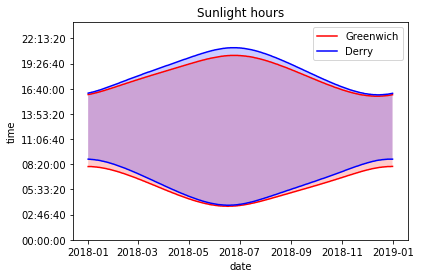

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime, os

# Let's make a function that combines all the steps to get the required data series:

def sunrisetimes(inFile, year=2018):
    # Read in data file:
    eg = pd.read_fwf(inFile, colspecs=[(0,2), (4,8)], skiprows=9, header=None)
    # Split up by column:
    sunrise = pd.read_fwf(inFile, colspecs=[(i, i+4) for i in range(4,132,11)], skiprows=9, header=None).values.T.flatten()
    sunset  = pd.read_fwf(inFile, colspecs=[(i, i+4) for i in range(9,137,11)], skiprows=9, header=None).values.T.flatten()
    # Remove NaN values for shorter months:
    sunrise = sunrise[~np.isnan(sunrise)].astype('int').tolist()
    sunset = sunset[~np.isnan(sunset)].astype('int').tolist()
    # Convert list of date strings to list of datetimes:
    srise = [datetime.time(int(str(a)[:-2]), int(str(a)[-2:]), 0) for a in sunrise]
    sset = [datetime.time(int(str(a)[:-2]), int(str(a)[-2:]), 0) for a in sunset]
    return srise, sset

year = 2018
periodlist = pd.date_range(start='%s-01-01' % year, end='%s-12-31' % year, freq='D')
datelist = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in periodlist]
    
r1, s1 = sunrisetimes(r'./GreenwichUK.txt')
r2, s2 = sunrisetimes(r'./DerryUK.txt')

# Create a nice plot for both series:
plt.figure()

# Plot the sunrise and sunset series as lineplots:
# Greenwich:
plt.plot(datelist, r1, label='Greenwich', color='red')
plt.plot(datelist, s1, color='red')

# Derry:
plt.plot(datelist, r2, label='Derry', color='blue')
plt.plot(datelist, s2, color='blue')

# Let's put a fill between the two line plots:
# Should probably use hatching instead here:
plt.fill_between(datelist, r1, s1, facecolor='red', alpha=0.2, interpolate=True)
plt.fill_between(datelist, r2, s2, facecolor='blue', alpha=0.2, interpolate=True)

plt.title('Sunlight hours')
plt.xlabel('date')

# Make sure the y axis covers the (almost) full range of 24 hours:
plt.ylim(["00:00:00", "23:59:59"])
# TODO: sort out the y axis tick value interval! 

plt.legend()
plt.show()